# Problem Statement-

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [312]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [313]:
#Read csv file and convert into Dataframe
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Observation-
The features in the above data set are-
- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

The label in the given dataset is-
- Loan_Status

In [314]:
#shape of file
data.shape

(614, 13)

In [317]:
# Checking for data types of the columns
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [318]:
#Dropping Loan_ID as it as no significant influence on loan status
data=data.drop(columns=["Loan_ID"])

In [319]:
#Checking for null values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 
The null values will be dealt post encoding

# Encoding object data into numeric data

In [320]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

for column in data:
    if data[column].dtype=='object':
        df=enc.fit_transform(data[column])
        data[column]=df

In [321]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Observation-

The categorical data for the below features have been encoded into numeric based on alphabetic order as follows-

- Gender-
       - 0- Female
       - 1- Male
        
- Married-
       - 0- No
       - 1- Yes
        
- Education-
       - 0- Graduate
       - 1- Not-Graduate
        
- Self.employed-
       - 0- No
       - 1- Yes
        
- Property Area-
       - 0- Rural
       - 1- Semi-urban
       - 2- Urban

- Loan_Status-
       - 0- No
       - 1- Yes

# Filling in the null values

In [322]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Observation-
As null values were present in features Gender, Married, Dependents, Self employed, but post encoding it got imputed wrongly, hence we check each feature individually and replace with the mode of the feature

In [323]:
print(data['Gender'].value_counts())
print(data['Married'].value_counts())
print(data['Dependents'].value_counts())
print(data['Self_Employed'].value_counts())

1    489
0    112
2     13
Name: Gender, dtype: int64
1    398
0    213
2      3
Name: Married, dtype: int64
0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64
0    500
1     82
2     32
Name: Self_Employed, dtype: int64


# 
Replacing the value been assigned to nulls by the mode of each feature

In [324]:
data['Gender']=data['Gender'].replace(2,data['Gender'].mode()[0])
data['Married']=data['Married'].replace(2,data['Married'].mode()[0])
data['Dependents']=data['Dependents'].replace(4,data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].replace(2,data['Gender'].mode()[0])

# Imputing the nulls

In [325]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [326]:
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df=pd.DataFrame(knnimp.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]), columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])
data['LoanAmount']=df['LoanAmount']
data['Loan_Amount_Term']=df['Loan_Amount_Term']

In [327]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 
All the nulls have been replaced accordingly

In [328]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,138.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [329]:
#Statistical Analysis
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.185668,5403.459283,1621.245798,146.568947,341.954397,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.389155,6109.041673,2926.248369,86.427282,64.494707,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,167.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Checking Correlation

In [330]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.023918,0.058809,0.082912,0.106694,-0.073370,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,-0.021584,0.051708,0.075948,0.149886,-0.102780,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.042142,0.118202,0.030430,0.144457,-0.099038,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.019059,-0.140760,-0.062290,-0.176363,-0.077456,-0.073658,-0.065243,-0.085884
Self_Employed,-0.023918,-0.021584,0.042142,-0.019059,1.000000,0.121356,0.028834,0.104676,-0.040220,0.041932,-0.022732,0.005857
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.121356,1.000000,-0.116605,0.579523,-0.044101,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,0.028834,-0.116605,1.000000,0.179601,-0.061507,0.011134,0.010522,-0.059187
LoanAmount,0.106694,0.149886,0.144457,-0.176363,0.104676,0.579523,0.179601,1.000000,0.040268,0.005855,-0.059453,-0.039695
Loan_Amount_Term,-0.073370,-0.102780,-0.099038,-0.077456,-0.040220,-0.044101,-0.061507,0.040268,1.000000,0.003872,-0.076990,-0.018577
Credit_History,0.009170,0.010938,-0.040160,-0.073658,0.041932,-0.018615,0.011134,0.005855,0.003872,1.000000,0.001963,0.540556


# 
For better understanding let's use a heat map

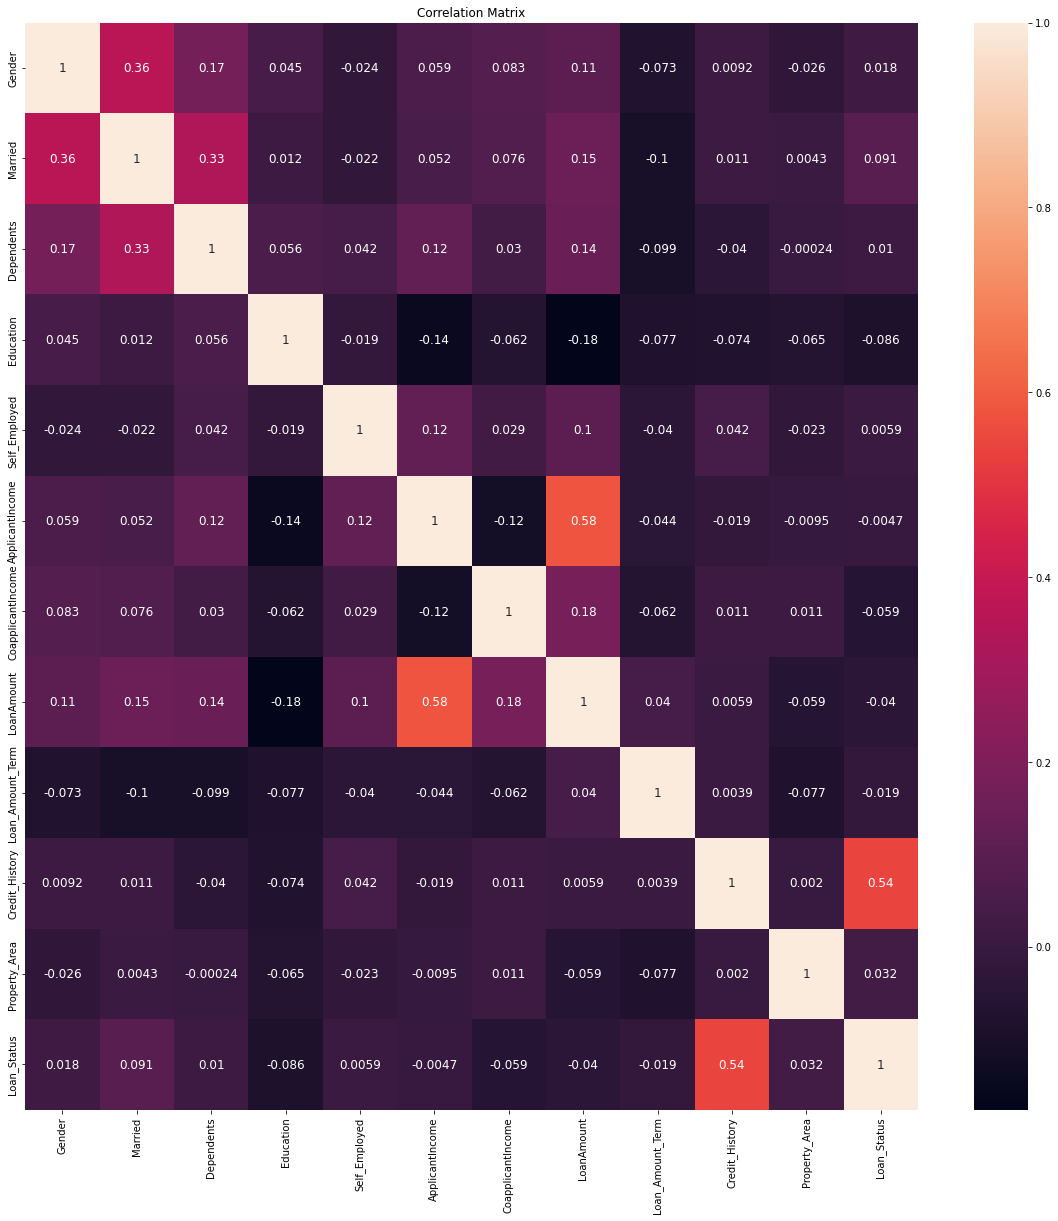

In [331]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

# Observation-
Let's print the correlation values of independent values with target variable for a better understanding

In [332]:
corr_matrix=data.corr()
corr_matrix["Loan_Status"].sort_values(ascending=True)

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.039695
Loan_Amount_Term    -0.018577
ApplicantIncome     -0.004710
Self_Employed        0.005857
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

# Observation-
- Features Education, CoapplicantIncome, LoanAmount, Loan_Amount_Term and ApplicantIncome are negatively correlated to the label Loan_Status
- Features Self_Employed, Dependents, Gender, Property_Area, Married and Credit_History are positively correlated to the label Loan_Status
- Education is 8.5% negatively correlated with Loan_Status showing a moderately weak bond
- ApplicantIncome is 0.4% negatively correlated with Loan_Status showing an extremely weak bond
- Credit_History is 53% positively correlated with Loan_Status showing a strong bond
- Self_Employed is 0.5% positively correlated with Loan_Status showing an extremely weak bond

# Visualization of the Data

1    502
0    112
Name: Gender, dtype: int64


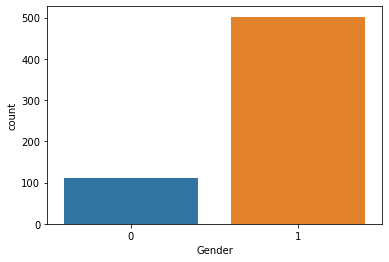

In [333]:
ax=sns.countplot(x="Gender", data=data)
print(data["Gender"].value_counts())

# 
There are 112 Females and 502 male applicants

1    401
0    213
Name: Married, dtype: int64


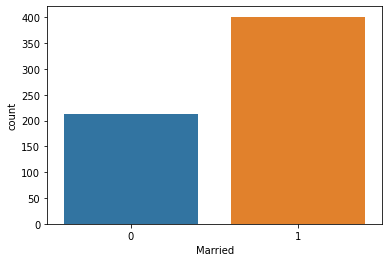

In [334]:
ax=sns.countplot(x="Married", data=data)
print(data["Married"].value_counts())

# 
There are 213 unmarried and 401 married applicants

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


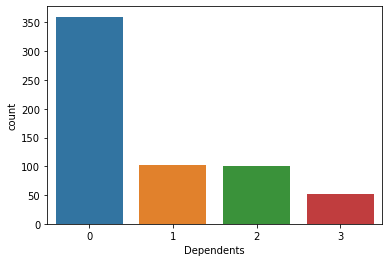

In [335]:
ax=sns.countplot(x="Dependents", data=data)
print(data["Dependents"].value_counts())

# 
360 applicants have 0 dependents, 102 applicants have 1 dependent, 101 applicants have 2 dependents and 51 applicants 3 or more than 3 dependents

0    480
1    134
Name: Education, dtype: int64


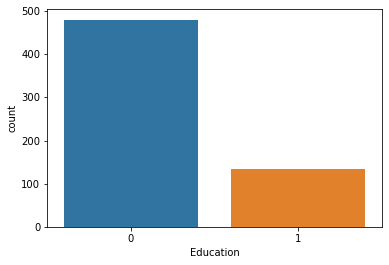

In [336]:
ax=sns.countplot(x="Education", data=data)
print(data["Education"].value_counts())

# 
480 applicants are graduates whereas 134 are non-graduates

0    500
1    114
Name: Self_Employed, dtype: int64


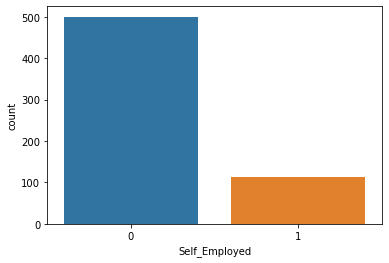

In [337]:
ax=sns.countplot(x="Self_Employed", data=data)
print(data["Self_Employed"].value_counts())

# 
500 applicants are unemployed, and 114 applicants are employed

1    233
2    202
0    179
Name: Property_Area, dtype: int64


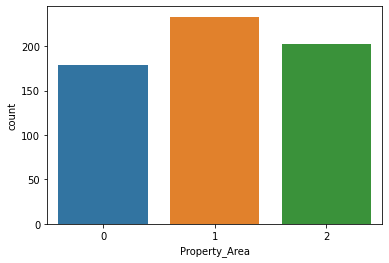

In [338]:
ax=sns.countplot(x="Property_Area", data=data)
print(data["Property_Area"].value_counts())

# 
179 applicants have property in rural area, 202 applicants have property in semi-urban area and 233 applicants have property in urban area

1.0    525
0.0     89
Name: Credit_History, dtype: int64


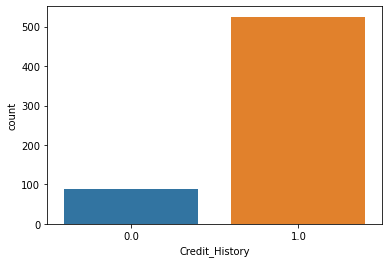

In [339]:
ax=sns.countplot(x="Credit_History", data=data)
print(data["Credit_History"].value_counts())

# 
89 applicants have 0 credit history and 525 have a credit history of 1

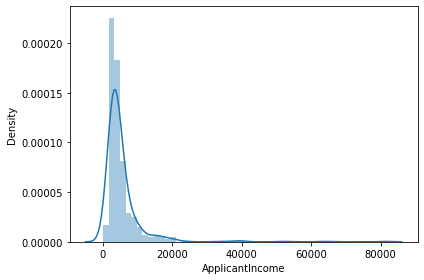

In [340]:
sns.distplot(data["ApplicantIncome"])
plt.xlabel("ApplicantIncome",fontsize=10)
plt.tight_layout()

# 
The data is not normally distributed and seems skewed

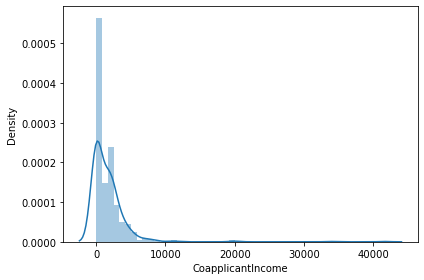

In [341]:
sns.distplot(data["CoapplicantIncome"])
plt.xlabel("CoapplicantIncome",fontsize=10)
plt.tight_layout()

# 
The data is not normally distributed and seems skewed

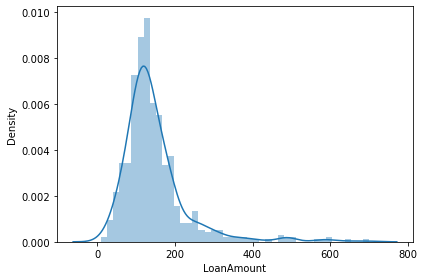

In [342]:
sns.distplot(data["LoanAmount"])
plt.xlabel("LoanAmount",fontsize=10)
plt.tight_layout()

# 
The data is not normally distributed and seems skewed

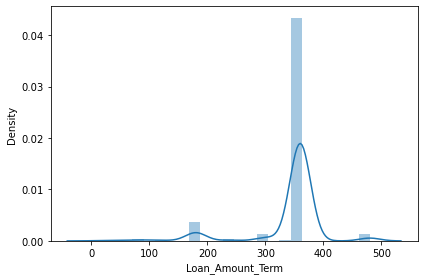

In [343]:
sns.distplot(data["Loan_Amount_Term"])
plt.xlabel("Loan_Amount_Term",fontsize=10)
plt.tight_layout()

# 
The data is not normally distributed and seems skewed

In [344]:
data.shape

(614, 12)

# Checking for outliers

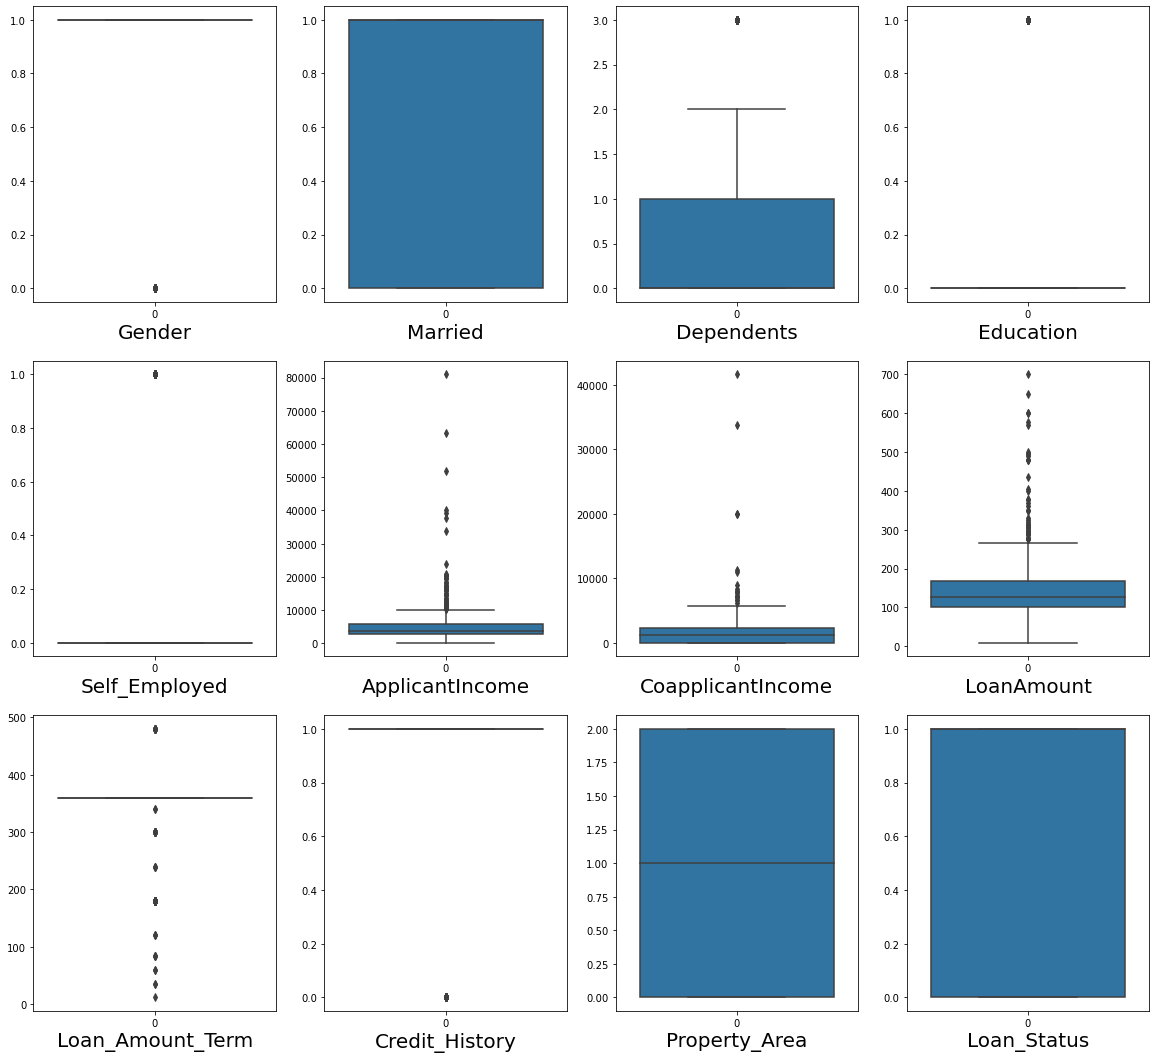

In [345]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if graph<=13:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features with continuous data containing outliers-

- Applicant Income
- Coapplicant Income
- Loan Amount
- Loan Amount Term

In [346]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(614, 12)

In [347]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 284, 308, 313, 333, 333, 369, 402, 409,
       417, 443, 487, 495, 497, 506, 523, 546, 561, 575, 581, 585, 600,
       604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 7, 8, 5,
       7, 7, 6, 5, 6, 5, 7, 8, 8, 7, 7, 8, 7, 8, 6, 8, 6, 7], dtype=int64))


In [348]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(614, 12)
(578, 12)


# 
The removal of these outliers is essential, the percentage loss is 5.86% which is tolerable

# # Divide Data Set into features and labels

In [349]:
y=data_new['Loan_Status']
x=data_new.drop(columns=['Loan_Status'])

In [350]:
#Confirming the skewness
x.skew().sort_values(ascending=False)

ApplicantIncome      2.060575
Self_Employed        1.670803
CoapplicantIncome    1.352458
Education            1.309263
LoanAmount           1.272751
Dependents           1.045496
Property_Area       -0.055174
Married             -0.625020
Gender              -1.625655
Credit_History      -1.978899
Loan_Amount_Term    -2.062136
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

CoapplicantIncome   
ApplicantIncome      
LoanAmount           
Self_Employed        
Education            
Dependents                 
Married            
Gender              
Credit_History      
Loan_Amount_Term  

Amongst the above features, only CoapplicantIncome, ApplicantIncome,LoanAmount and LoanAmountTerm are continous and their skewness need to be removed

# Transforming Data to remove skewness

In [351]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [352]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

Self_Employed        1.670803
Education            1.309263
Loan_Amount_Term     0.705600
Dependents           0.474681
LoanAmount           0.042683
ApplicantIncome      0.028051
Property_Area       -0.154907
CoapplicantIncome   -0.188561
Married             -0.625020
Gender              -1.625655
Credit_History      -1.978899
dtype: float64

# 
Skewness has been removed, let's move forward

# Scaling the data

In [356]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Using Logistic Regression Model

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [357]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.8362068965517241 random_state 0
accuracy 0.8362068965517241 random_state 0
accuracy 0.8103448275862069 random_state 1
accuracy 0.8189655172413793 random_state 2
accuracy 0.8103448275862069 random_state 3
accuracy 0.8017241379310345 random_state 4
accuracy 0.7844827586206896 random_state 5
accuracy 0.8103448275862069 random_state 6
accuracy 0.7931034482758621 random_state 7
accuracy 0.7758620689655172 random_state 8
accuracy 0.7931034482758621 random_state 9
accuracy 0.9137931034482759 random_state 10
accuracy 0.9137931034482759 random_state 10
accuracy 0.8620689655172413 random_state 11
accuracy 0.8793103448275862 random_state 12
accuracy 0.8103448275862069 random_state 13
accuracy 0.75 random_state 14
accuracy 0.8620689655172413 random_state 15
accuracy 0.8017241379310345 random_state 16
accuracy 0.8362068965517241 random_state 17
accuracy 0.7586206896551724 random_state 18
accuracy 0.8362068965517241 random_state 19
accuracy 0.8017241379310345 random_state 20
accuracy 0.83

In [358]:
#creating train-test-sloit using best random state observed(i.e.10)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [373]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  91.37931034482759
[[14 10]
 [ 0 92]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        24
           1       0.90      1.00      0.95        92

    accuracy                           0.91       116
   macro avg       0.95      0.79      0.84       116
weighted avg       0.92      0.91      0.90       116



# Using Decision Tree Classifier

In [374]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  84.48275862068965
[[19  5]
 [13 79]]
              precision    recall  f1-score   support

           0       0.59      0.79      0.68        24
           1       0.94      0.86      0.90        92

    accuracy                           0.84       116
   macro avg       0.77      0.83      0.79       116
weighted avg       0.87      0.84      0.85       116



# Using Random Forest CLassifier

In [376]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  88.79310344827587
[[16  8]
 [ 5 87]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.92      0.95      0.93        92

    accuracy                           0.89       116
   macro avg       0.84      0.81      0.82       116
weighted avg       0.88      0.89      0.89       116



# Using SVC

In [377]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  92.24137931034483
[[15  9]
 [ 0 92]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.91      1.00      0.95        92

    accuracy                           0.92       116
   macro avg       0.96      0.81      0.86       116
weighted avg       0.93      0.92      0.92       116



# Cross Validation

In [381]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.8149775112443777


In [403]:
scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr2.mean())

Cross validation score of Decision Tree Classifier:  0.7042578710644678


In [404]:
scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr3.mean())

Cross validation score of Random Forest Classifier:  0.7976761619190406


In [402]:
scr4=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model: ", scr4.mean())

Cross validation score of SVC model:  0.6920539730134933


# 
Logistic Regression is performing better, hence it is carried forward

# AUC ROC curve

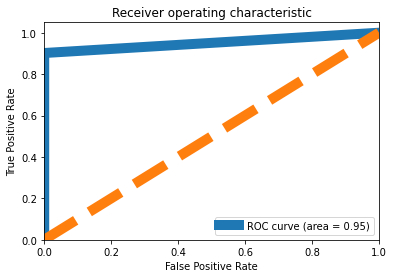

In [405]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(predlr, y_test)
roc_auc=auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=10, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Saving the Logistic Regression Model

In [407]:
filename='Loan Status Prediction.pkl'
pickle.dump(LR, open(filename,'wb'))